# First trial at displaying a shaft created with gdf_to_ug


In [1]:
import geopandas as gpd
from geometron.geom_to_vtk import gdf_to_ug
import pyvista as pv
#import pandas as pd

In [2]:
gdf = gpd.read_file('../../../../data/example.gpkg', layer = 'shaft')

In [3]:
gdf.head()

,Nom,Début ou fin,geometry
0,Siège Sacré-Français - P2,F,POINT Z (154574.791 123702.097 -725.000)
1,Siège Sacré-Français - P2,D,POINT Z (154574.791 123702.097 125.000)


In [4]:
from shapely.geometry import LineString
line = LineString([gdf.geometry[0].coords[0], gdf.geometry[1].coords[0]])

In [5]:
list(line.coords)

[(154574.7908252656, 123702.0971627403, -725.0),
 (154574.7908252656, 123702.09716274042, 125.0)]

In [6]:
d = gdf.to_dict ('records')
d

[{'Nom': 'Siège Sacré-Français - P2',
  'Début ou fin ': 'F',
  'geometry': <shapely.geometry.point.Point at 0x7f216c5d7a60>},
 {'Nom': 'Siège Sacré-Français - P2',
  'Début ou fin ': 'D',
  'geometry': <shapely.geometry.point.Point at 0x7f21a9ebfac0>}]

In [7]:
new_gdf = {'Nom' : 'line', 'Début ou fin' : '_', 'geometry': line}
d.append(new_gdf)

In [8]:
extra_gdf = gpd.GeoDataFrame(d)

In [9]:
extra_gdf

,Nom,Début ou fin,geometry,Début ou fin
0,Siège Sacré-Français - P2,F,POINT Z (154574.791 123702.097 -725.000),NaN
1,Siège Sacré-Français - P2,D,POINT Z (154574.791 123702.097 125.000),NaN
2,line,NaN,"LINESTRING Z (154574.791 123702.097 -725.000, ...",_


In [10]:
ug = gdf_to_ug(extra_gdf)
ug

UnstructuredGrid (0x7f216c5606a0)
  N Cells:	3
  N Points:	4
  X Bounds:	1.546e+05, 1.546e+05
  Y Bounds:	1.237e+05, 1.237e+05
  Z Bounds:	-7.250e+02, 1.250e+02
  N Arrays:	1

## Interactive representation

In [11]:
dargs = dict(scalars='Elevation', cmap='rainbow', show_edges=True, window_size=(1024,480))

ug.plot(jupyter_backend='panel', color='w', style='surface', interpolate_before_map=True,
           scalar_bar_args={'title': 'Elevation'},
           **dargs)

## Static representation for thumbnail

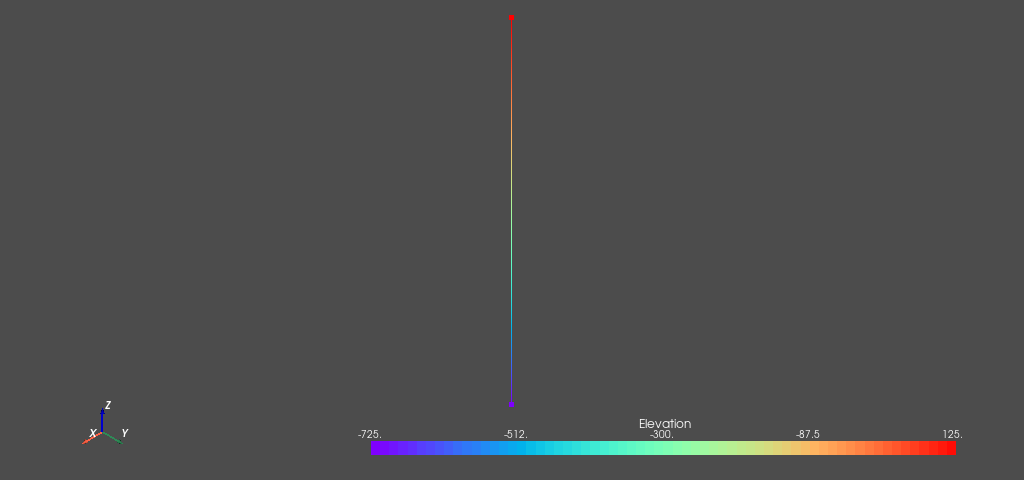

In [12]:
dargs = dict(scalars='Elevation', cmap='rainbow', show_edges=True, window_size=(1024,480))

ug.plot(jupyter_backend='static', color='w', style='surface', interpolate_before_map=True,
        scalar_bar_args={'title': 'Elevation'}, **dargs)